In [150]:
# Import the libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib
from textwrap import wrap
from matplotlib import ticker
from datetime import datetime


warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline


In [151]:
#print(os.listdir('../data'))
#df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
#df['Date'] = df.apply(lambda x: datetime.strptime(x['Date'], '%d-%m-%Y').date(), axis=1) #convert the date
#df = df.groupby('Date')['Cases'].sum().reset_index() #group the data
#df.head()

In [152]:
#print(os.listdir('../data'))
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
#df = df.set_index('Date', append=False)
#df['Date'] = df.apply(lambda x: datetime.strptime(x['Date'], '%d-%m-%Y').date(), axis=1) #convert the date
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data
df['Date'] = pd.to_datetime(df['Date'])    
df['date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
df.head()

,Date,Cases,date_delta
0,2020-03-04,2,0.0
1,2020-05-04,2,61.0
2,2020-07-04,2,122.0
3,2020-09-04,1,184.0
4,2020-10-04,2,214.0


In [153]:
import datetime
X = df['date_delta']
y = df.iloc[:, 1].values
print(X)

0       0.0
1      61.0
2     122.0
3     184.0
4     214.0
5     245.0
6     274.0
7      16.0
8      20.0
9      21.0
10     25.0
11     26.0
12     27.0
Name: date_delta, dtype: float64


In [157]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
series = y
# split dataset
#X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

ValueError: maxlag should be < nobs

In [142]:
# split data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [143]:
X_train


8      20.0
1      61.0
7      16.0
9      21.0
3     184.0
0       0.0
5     245.0
12     27.0
Name: date_delta, dtype: float64

In [144]:
# Fitting simple linear regression to training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#y_pred = regressor.predict([[X_test]])
regressor.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 20.  61.  16.  21. 184.   0. 245.  27.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [114]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

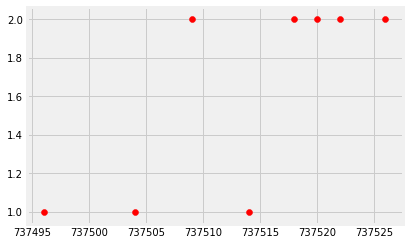

In [115]:
# Visualizing the training set
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

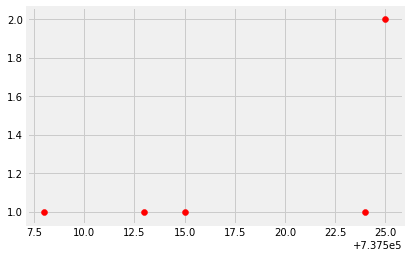

In [116]:
# Visualizing the test set 
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [158]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../data/NumberConfirmedOfCases.csv')
df = df.groupby('Date')['Cases'].sum().reset_index() #group the data
df.set_index('Date', inplace=True)
df.head()

,Cases
Date,
03-04-2020,2
05-04-2020,2
07-04-2020,2
09-04-2020,1
10-04-2020,2


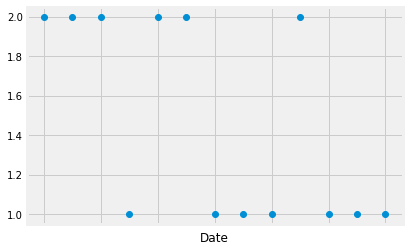

In [162]:
df['Cases'].dropna().plot(marker = 'o',ls='')

Test MSE: 0.429


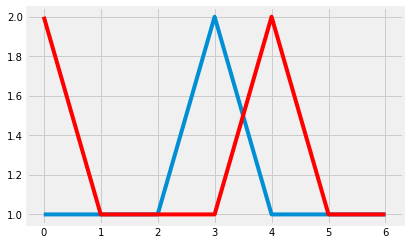

In [167]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
values = DataFrame(df.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()
#The expected values for the next 7 days are plotted (blue) compared to the predictions from the model (red).

In [169]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
# split dataset
values = DataFrame(df.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
print(X)
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

[[nan  2.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  1.]
 [ 1.  2.]
 [ 2.  2.]
 [ 2.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  2.]
 [ 2.  1.]
 [ 1.  1.]
 [ 1.  1.]]


ValueError: Only the univariate case is implemented

In [163]:
y=np.array(df['Cases'].dropna().values, dtype=float)
x=np.array(pd.to_datetime(df['Cases'].dropna()).index.values, dtype=float)
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

ValueError: could not convert string to float: '03-04-2020'

NameError: name 'xf1' is not defined

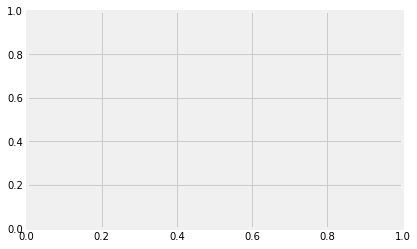

In [164]:
f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=3)
df['Cases'].dropna().plot(ax=ax,marker='o', ls='')
plt.ylabel('Arsenic concentration')
ax.legend()